# Wildfire Severity Estimates to Support Property Insurance Metrics 

### Wildfires account for a significant portion of total property losses and consequently highly impact the buisness insurance industry.

Total wildfire suppression costs have averaged approximately [$2.6 billion over the past 5 years](https://www.nifc.gov/fire-information/statistics/suppression-costs) according to the National Interagency Fire Center. Verisk Analytics, a data analytics company that assesses insurance risk, identified more than [4.5 million U.S. homes](https://www.forbes.com/advisor/homeowners-insurance/wildfires/) as being at high or extreme risk of wildfire and on average more than [2,500 homes in the U.S.](https://www.forbes.com/advisor/homeowners-insurance/wildfires/) are destroyed every year due to wildfires. As a result, insurers face huge losses and many have pulled back from fire prone areas. This negatively impacts the insurance companies, as well as the local communities. 

With high severity and low frequency, fire losses are inherently volatile, which makes modeling and predicting their impacts extremely difficult. Wildfires will only get worse due to warmer, drier environmental conditions, increases in drought severity, and longer fire seasons resulting from future climate change. 

### This project built Machine Learning Algorithms to predict wildfire severity using NASA spatial products and a large historical wildfire database.

My objective was to quantify and predict wildfire severity in the western U.S. based on relevant historical and spatial datasets. The spatial trends and drivers of wildfire severity can be used as a metric for homeowners and insurance agencies when negotiating insurance policies.   

I downloaded NASA spatial datasets of soil and vegetation and collected historical records of fire location, total burned acres, and other noted damage resulting from a fire from an online database. The data was used with machine learning models to rate areas as having a low to high risk of wildfire severity. Additional features can be added to these models to improve future wildfire severity predictions and aid insurers with policy assessement.

## How is wildfire severity quantified?

There are several factors to consider when describing and quantifying wildfire severity.

__Acres burned__: The total number of acres burned by a fire. __Fire Class__ is a common metric for grouping wildfires into categories based on acres burned.

| Fire Class | Description |
| --- | --- |
| Class A | < 0.25 acres |
| Class B | 0.25 acre - 10 acres |
| Class C | 10 - 100 acres |
| Class D | 100 - 300 acres |
| Class E | 300 - 1,000 acres |
| Class F | 1,000 - 5,000 acres |
| Class G | > 5,000 acres |

__Wildfire occurrence__: This is the number of recorded fires in a defined area.

__Fire intensity__: This reflects the amount of energy released per unit length of the flame front. It is often, but not always, related to fire severity.

__Fire severity__: This is the amount of vegetation destroyed or other ecological and infrastructure damage incurred from a wildfire. Overall, drier, warmer and windier conditions lead to greater fire severity in terms of vegetation destruction and also increase the probability of loss of lives and damage to properties. An area's susceptibility to fire severity is often extremely difficult to quantify. 


# Description of Datasets and Model Features

I used two datasets in this analysis: 1) U.S. Historical Wildfire Dataset and 2) NASA soil and vegetation geospatial data.

<img src="figures/flowchart_diagram.png">

### 1. U.S. Historical Wildfire Dataset

This SQL [dataset](https://www.kaggle.com/rtatman/188-million-us-wildfires) includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned from 1992 to 2015 in the United States. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations and the data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG). Basic error-checking was performed and redundant records were identified and removed.

__Let's do some data exploration!__

The large SQL dataset I manipulated for this analysis was too large to upload to an online repository, but is available upon request. Several figures visualizing aspects of the entire SQL dataset are provided within this notebook. Code to recreate these figures is provided in the repository. Four western states (CA, OR, WA, NV) were extracted from the dataset and are available within the repository as csv files.

<img src="figures/total_fires_by_state.png" width="800">
<img src="figures/reported_fires_US_by_yr.png" width="400"> 
<img src="figures/acres_final_perimeter_US.png" width="800"> 

#### Calculate the Number of Fires in Each Size Class by State (refer to the Fire Class Table above)

The cell below will calculate the number of fires per fire class. Update the variable "state" and re-run the cell block to look at other US states.

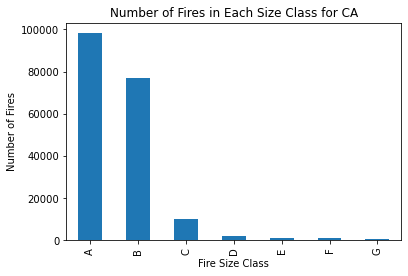

In [1]:
import warnings
warnings.filterwarnings('ignore')
import data_visualizations

# Specify state from list: ['CA', 'WA', 'OR', 'NV']
state = 'CA'

data_visualizations.fig_fire_class(state)

### 2. NASA Soil and Vegetation Spatial Datasets

The [soils](https://ldas.gsfc.nasa.gov/nldas/soils) and [vegetation](https://ldas.gsfc.nasa.gov/nldas/vegetation-class) spatial data (NetCDF file format) are publicly available NASA data products used for the [North American Land Data Assimilation System (NLDAS)](https://ldas.gsfc.nasa.gov/nldas) across the contiguous United States. The soils dataset was derived from 1-km Penn State [STATSGO](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/geo/?cid=nrcs142p2_053629) data and there are 16 classifications of soil texture or types. The land cover and vegetation classification map was generated using imagery from [AVHRR satellites](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-advanced-very-high-resolution-radiometer-avhrr?qt-science_center_objects=0#qt-science_center_objects) between 1981 and 1994. There are 14 vegetation and land cover class at a 1-km resolution.

| Soil Index | Soil Texture Class | Vegetation Index | Vegetation Class |
| --- | --- | ---| --- |
| | | 0 | Water |
| 1 | SAND | 1 | Evergreen Needleleaf Forest |
| 2 | LOAMY SAND | 2 | Evergreen Broadleaf Forest |
| 3 | SANDY LOAM | 3 | Deciduous Needleleaf Forest |
| 4 | SILT LOAM | 4 | Deciduous Broadleaf Forest |
| 5 | SILT | 5 | Mixed Cover |
| 6 | LOAM | 6 | Woodland |
| 7 | SANDY CLAY LOAM | 7 | Wooded Grassland |
| 8 | SILTY CLAY LOAM | 8 | Closed Shrubland |
| 9 | CLAY LOAM | 9 | Open Shrubland |
| 10 | SANDY CLAY | 10 | Grassland |
| 11 | SILTY CLAY | 11 | Cropland |
| 12 | CLAY | 12 | Bare Ground |
| 13 | ORGANIC MATERIAL | 13 | Urban and Built-Up |
| 14 | WATER |
| 15 | BEDROCK |
| 16 | OTHER(land-ice) |

__Let's do some data exploration!__


#### Visualize Geospatial Soils and Vegetation Data for Each Reported Fire

I extracted the classified soil texture and vegetation for each reported fire location from the historical dataset. This notebook can visualize this for the Western U.S. states of California (CA), Oregon (OR), Washington (WA) and Nevada (NV). The figure legends relate to the classifications in the table above. 

<img src="figures/soil_veg_map_CA.png" width="800"> 

Update the variable "state" and re-run the cell block to look at other US states.

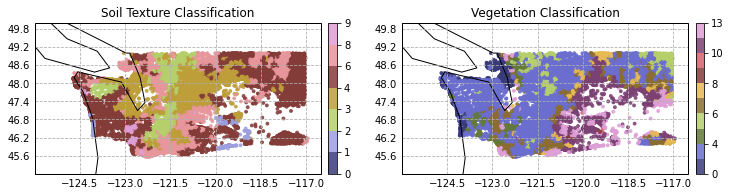

In [2]:
# Specify state from list: ['CA', 'WA', 'OR', 'NV']
state = 'WA'

data_visualizations.fig_soil_veg_map(state)

# Wildfire Severity Predictions

Machine learning (ML) models were built using python's [scikit-learn](https://scikit-learn.org/stable/) library. The analysis was implemented by state and for each state 20% of the data was held for testing (random state = 25). First, I removed null values from the histroical dataset and encoded each of its categorical features (OneHotEncoding). Next, I standardized many of the numeric features (StandardScalar) by subtracting the mean and dividing by the standard deviation so the mean = 0 and standard deviation = 1. 

| State | Size of Training | Size of Testing |
| --- | --- | ---|
| CA | 151640 | 37910 |
| OR | 48870 | 12218 |
| WA | 26810 | 6703 |
| NV | 13564 | 3392 |


ML algorithms were fit in two ways: 1) estimate the fire class directly and 2) estimate the total number of acres burned for a specific location and then translate the estimated burned acres into one the fire classes. Metrics were calculated from the test dataset and the ML fire class predictions using scikit-learn built-in functions (accuracy_score, r2_score, and mean_squared_error). The best ML model for each state was pickled and saved. Unfortunately, the ML models were too large to upload to the github repository. 

### Predictions from the best models for each state are visualized below. 

<img src='figures/ML_prediction_test_CA.png' width="800"> 
<img src='figures/ML_prediction_test_WA.png' width="800"> 
<img src='figures/ML_prediction_test_OR.png' width="800"> 
<img src='figures/ML_prediction_test_NV.png' width="800"> 

If you would like to re-train an ML model, you can run the cell block below - however it will take some time to run. To edit the model, edit the python script "ML_wildfire_severity.py" in the source directory.

Number of training examples: 13564
Number of testing examples: 3392


/Users/catiefinkenbiner/Documents/The Data Incubator/Capstone/Wildfire_Severity_Prediction/ML_wildfire_severity.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/catiefinkenbiner/Documents/The Data Incubator/Capstone/Wildfire_Severity_Prediction/ML_wildfire_severity.py:188: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/Users/catiefinkenbiner/.conda/envs/conda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



 Accuracy:  0.5981721698113207


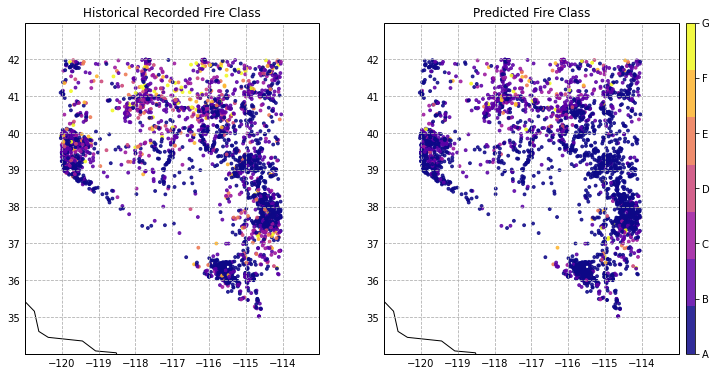

In [4]:
## Run this cell to re-train ML model and make predictions.
import ML_wildfire_severity

# Specify state from list: ['CA', 'WA', 'OR', 'NV']
state = 'NV'

ML_wildfire_severity.make_predictions(state)

# Model Evaluation & Summary

Estimating the fire class directly yielded higher accuracy compared to estimating the number of burned acres and translating that value to a fire class. 

The ML model which achieved the highest accuracy was a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). I was able to achieve 62% accuracy for California, 71% accuracy for Oregon, 63% accuracy for Washington, and 60% accuracy for Nevada.

Many of the One Hot Encoded categorical data from the historical dataset did not improve model accurancy and were removed as features from the final prediction. Removing these features also decreased the model training time. The soil and vegetation datasets were key to improving model performance. 

All python scripts are available on github and are intended to be easily adaptable to predict fire severity across  different regions of interest.


# Applications for Insurers

Areas can easily be identfied as being at high or low risk of severe damage from wildfires. Areas which were predicted to have Fire Class G have the highest risk of wildfire.

The machine learning models can be used to predict fire classes geospatially. These can be used to predict future fire severity and potential damage.

Many of the spatial patterns of soils and vegetation align with the assigned fire classes from historic fires (i.e., soils and vegetation are key features for identifying wildfire spatial patterns). Therefore, the spatial trends and drivers of wildfire severity could be used as a metric for homeowners and insurance agencies when negotiating insurance policies. 

Additional states, new features, and supporting datasets (like satellite imagery) can be brought into this analysis to improve upon these fire severity predictions. Additional metrics, such as fire intensity, could also be predicted by adapting this model framework.